# Vectorized Backtest of Simple SMA Strategy

## Import Libraries

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("seaborn")
from itertools import product

import yfinance as yf

## Get Data from yfinance 

In [2]:
#daily data
def get_data(pairs):
    global df, symbol
    NUM_DAYS = 10000    # The number of days of historical data to retrieve
    INTERVAL = '1d'
    symbol = str(pairs + "=X")  #str(input("Please enter stock symbol: "))     # Symbol of the desired stock

    #define start & dates
    start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
    end = datetime.datetime.today()
    
    #pull data
    df = yf.download(symbol, start=start, end=end, interval=INTERVAL)
    return df

In [3]:
pair = "NZDJPY"
df = get_data(pair)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,70.335999,70.658997,69.889999,70.122002,70.122002,0
2003-12-02,70.140999,70.621002,70.065002,70.195000,70.195000,0
2003-12-03,70.231003,70.478996,69.738998,69.945000,69.945000,0
2003-12-04,69.849998,70.079002,69.577003,69.845001,69.845001,0
2003-12-05,69.805000,69.950996,69.143997,69.336998,69.336998,0
...,...,...,...,...,...,...
2022-06-14,84.214996,84.699776,83.615997,84.214996,84.214996,0
2022-06-15,84.232002,84.390999,83.744003,84.232002,84.232002,0
2022-06-16,84.370003,84.709999,82.982002,84.370003,84.370003,0


## Define SMA Strategy

#### SMA STRATEGY LOGIC

Enter a buy when sma_short is above sma_long and enter a sell when sma_short is below sma_long 

In [4]:
#close price only
data = df.Close.to_frame()
data

,Close
Date,
2003-12-01,70.122002
2003-12-02,70.195000
2003-12-03,69.945000
2003-12-04,69.845001
2003-12-05,69.336998
...,...
2022-06-14,84.214996
2022-06-15,84.232002
2022-06-16,84.370003


In [5]:
#define SMA values

sma_short = 55
sma_long = 200

#calculate SMA values 
data["SMA_55"] = data.Close.rolling(sma_short).mean()
data["SMA_200"] = data.Close.rolling(sma_long).mean()


#drop missing values
data = data.dropna()
data

,Close,SMA_55,SMA_200
Date,,,
2004-09-03,71.245003,71.014455,70.671980
2004-09-06,71.555000,71.070418,70.679145
2004-09-07,70.625000,71.107709,70.681295
2004-09-08,71.461998,71.178237,70.688880
2004-09-09,71.456001,71.236800,70.696935
...,...,...,...
2022-06-14,84.214996,84.172080,80.142635
2022-06-15,84.232002,84.149516,80.172465
2022-06-16,84.370003,84.137389,80.203220


### Visualize Close Price & SMAs

<function matplotlib.pyplot.show(close=None, block=None)>

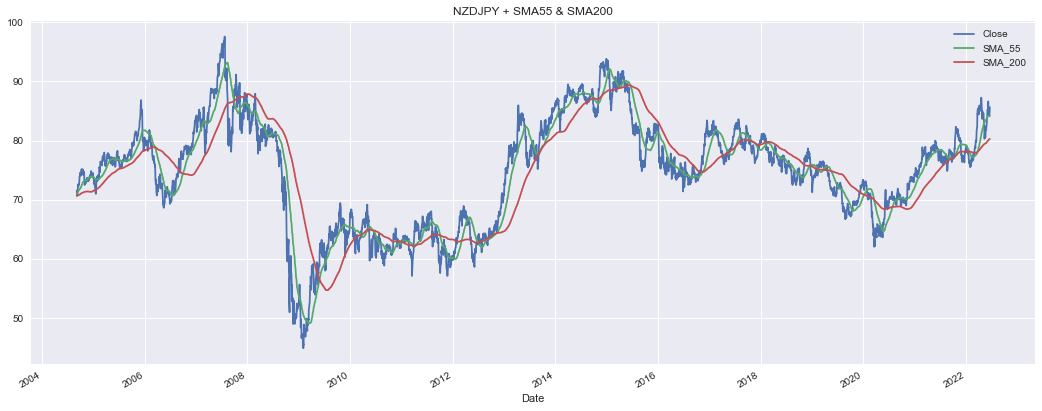

In [6]:
data.plot(figsize = (18,7), title = f"{pair} + SMA{sma_short} & SMA{sma_long}")
#plt.grid()
plt.show

## SMA STRATEGY LOGIC

Enter a buy when sma_short is above sma_long and enter a sell when sma_short is below sma_long 

In [7]:
# Define Positions (Long or Short). Where 1 = Buy, -1 = Sell

data["position"] = np.where(data["SMA_55"] > data["SMA_200"], 1, -1)
data

C:\Users\RAIMIA~1\AppData\Local\Temp/ipykernel_11968/2426428956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = np.where(data["SMA_55"] > data["SMA_200"], 1, -1)


,Close,SMA_55,SMA_200,position
Date,,,,
2004-09-03,71.245003,71.014455,70.671980,1
2004-09-06,71.555000,71.070418,70.679145,1
2004-09-07,70.625000,71.107709,70.681295,1
2004-09-08,71.461998,71.178237,70.688880,1
2004-09-09,71.456001,71.236800,70.696935,1
...,...,...,...,...
2022-06-14,84.214996,84.172080,80.142635,1
2022-06-15,84.232002,84.149516,80.172465,1
2022-06-16,84.370003,84.137389,80.203220,1


### Define Buy & Hold Returns

i.e at the beginning of the dataset, if we buy the instrument, what will be the return as of present

daily log returns

In [8]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))


#daily return of strategy
data["strategy"] = data.position.shift(1) * data["returns"]
data.dropna(inplace = True)

C:\Users\RAIMIA~1\AppData\Local\Temp/ipykernel_11968/1320565479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
C:\Users\RAIMIA~1\AppData\Local\Temp/ipykernel_11968/1320565479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strategy"] = data.position.shift(1) * data["returns"]
C:\Users\RaimiAzeez\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

### Calculate Absolute Performance 

In [9]:
#calculate absolute performance
data[["returns", "strategy"]].sum()

returns     0.183841
strategy   -0.459237
dtype: float64

In [10]:
#CALCULATE ACTUAL VALUE OF ABSOLUTE PERFORMANCE

data[["returns", "strategy"]].sum().apply(np.exp)

returns     1.201825
strategy    0.631765
dtype: float64

In [11]:
#annual return
data[["returns", "strategy"]].mean() * 252

returns     0.010010
strategy   -0.025006
dtype: float64

In [12]:
#annual risk
data[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.155391
strategy    0.155384
dtype: float64

### Calculate Cummulative returns 

In [13]:
data["cum_returns"] = data["returns"].cumsum().apply(np.exp)
data["cum_strategy"] = data["strategy"].cumsum().apply(np.exp)
data

C:\Users\RAIMIA~1\AppData\Local\Temp/ipykernel_11968/618857058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cum_returns"] = data["returns"].cumsum().apply(np.exp)
C:\Users\RAIMIA~1\AppData\Local\Temp/ipykernel_11968/618857058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cum_strategy"] = data["strategy"].cumsum().apply(np.exp)


,Close,SMA_55,SMA_200,position,returns,strategy,cum_returns,cum_strategy
Date,,,,,,,,
2004-09-06,71.555000,71.070418,70.679145,1,0.004342,0.004342,1.004351,1.004351
2004-09-07,70.625000,71.107709,70.681295,1,-0.013082,-0.013082,0.991298,0.991298
2004-09-08,71.461998,71.178237,70.688880,1,0.011782,0.011782,1.003046,1.003046
2004-09-09,71.456001,71.236800,70.696935,1,-0.000084,-0.000084,1.002962,1.002962
2004-09-10,71.753998,71.297218,70.709020,1,0.004162,0.004162,1.007144,1.007144
...,...,...,...,...,...,...,...,...
2022-06-14,84.214996,84.172080,80.142635,1,-0.014184,-0.014184,1.182048,0.621369
2022-06-15,84.232002,84.149516,80.172465,1,0.000202,0.000202,1.182286,0.621495
2022-06-16,84.370003,84.137389,80.203220,1,0.001637,0.001637,1.184223,0.622513


<function matplotlib.pyplot.show(close=None, block=None)>

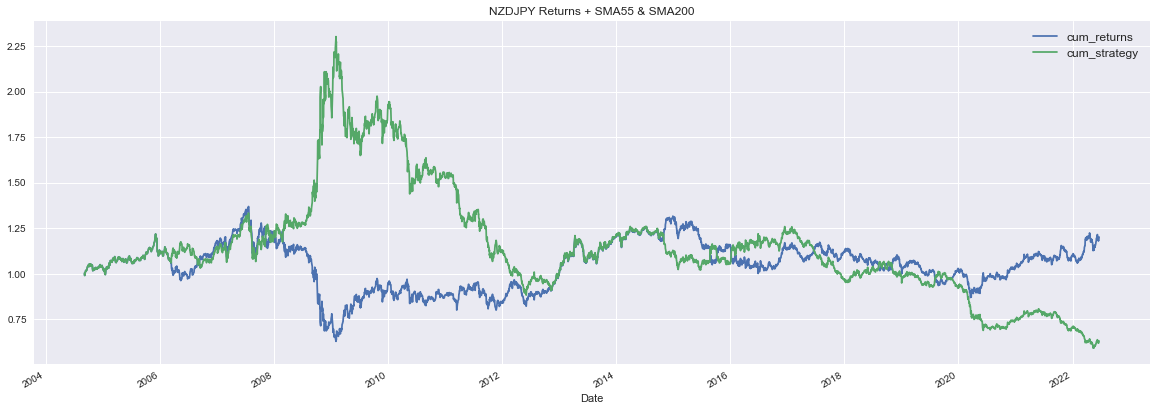

In [14]:
#Visualize Cummulative returns
data[["cum_returns", "cum_strategy"]].plot(figsize = (20,7), title = f"{pair} Returns + SMA{sma_short} & SMA{sma_long}" )
plt.legend(fontsize = 12)
plt.show

In [15]:
strat_perf = data.cum_strategy.iloc[-1] - data.cum_returns.iloc[-1]
round(strat_perf,5)

-0.57006

In [16]:
data

,Close,SMA_55,SMA_200,position,returns,strategy,cum_returns,cum_strategy
Date,,,,,,,,
2004-09-06,71.555000,71.070418,70.679145,1,0.004342,0.004342,1.004351,1.004351
2004-09-07,70.625000,71.107709,70.681295,1,-0.013082,-0.013082,0.991298,0.991298
2004-09-08,71.461998,71.178237,70.688880,1,0.011782,0.011782,1.003046,1.003046
2004-09-09,71.456001,71.236800,70.696935,1,-0.000084,-0.000084,1.002962,1.002962
2004-09-10,71.753998,71.297218,70.709020,1,0.004162,0.004162,1.007144,1.007144
...,...,...,...,...,...,...,...,...
2022-06-14,84.214996,84.172080,80.142635,1,-0.014184,-0.014184,1.182048,0.621369
2022-06-15,84.232002,84.149516,80.172465,1,0.000202,0.000202,1.182286,0.621495
2022-06-16,84.370003,84.137389,80.203220,1,0.001637,0.001637,1.184223,0.622513


In [17]:
#Create Backtest function

def sma_backtest(data, sma_short, sma_long):
    df = data.copy()
    df["returns"] = np.log(df.Close.div(df.Close.shift(1)))
    df["SMA_55"] = data.Close.rolling(sma_short).mean()
    df["SMA_200"] = data.Close.rolling(sma_long).mean()
    df.dropna(inplace = True)
    
    df["position"] = np.where(df["SMA_55"] > df["SMA_200"], 1, -1)
    df["strategy"] = df.position.shift(1) * df["returns"]
    df.dropna(inplace = True)
    
    return round(np.exp(df["strategy"].sum()), 5) #returns the absolute performance of strategy
    
    

In [18]:
abs_perf = sma_backtest(data, 55, 200)
abs_perf

0.58344

In [19]:
abs_perf = sma_backtest(data, 75, 150)
abs_perf

0.92918

### Optimize SMA combination

In [20]:
#range of sma
range_sma_short = range(3, 50, 1)
range_sma_long = range(55, 250, 1)

In [21]:
#combination of SMAs
smas = list(product(range_sma_short, range_sma_long))
smas

[(3, 55),
 (3, 56),
 (3, 57),
 (3, 58),
 (3, 59),
 (3, 60),
 (3, 61),
 (3, 62),
 (3, 63),
 (3, 64),
 (3, 65),
 (3, 66),
 (3, 67),
 (3, 68),
 (3, 69),
 (3, 70),
 (3, 71),
 (3, 72),
 (3, 73),
 (3, 74),
 (3, 75),
 (3, 76),
 (3, 77),
 (3, 78),
 (3, 79),
 (3, 80),
 (3, 81),
 (3, 82),
 (3, 83),
 (3, 84),
 (3, 85),
 (3, 86),
 (3, 87),
 (3, 88),
 (3, 89),
 (3, 90),
 (3, 91),
 (3, 92),
 (3, 93),
 (3, 94),
 (3, 95),
 (3, 96),
 (3, 97),
 (3, 98),
 (3, 99),
 (3, 100),
 (3, 101),
 (3, 102),
 (3, 103),
 (3, 104),
 (3, 105),
 (3, 106),
 (3, 107),
 (3, 108),
 (3, 109),
 (3, 110),
 (3, 111),
 (3, 112),
 (3, 113),
 (3, 114),
 (3, 115),
 (3, 116),
 (3, 117),
 (3, 118),
 (3, 119),
 (3, 120),
 (3, 121),
 (3, 122),
 (3, 123),
 (3, 124),
 (3, 125),
 (3, 126),
 (3, 127),
 (3, 128),
 (3, 129),
 (3, 130),
 (3, 131),
 (3, 132),
 (3, 133),
 (3, 134),
 (3, 135),
 (3, 136),
 (3, 137),
 (3, 138),
 (3, 139),
 (3, 140),
 (3, 141),
 (3, 142),
 (3, 143),
 (3, 144),
 (3, 145),
 (3, 146),
 (3, 147),
 (3, 148),
 (3, 149),


In [22]:
len(smas)

9165

In [23]:
#iterate through sma combination and test strategy 
abs_perform = []
for pro in smas:
    abs_perform.append(sma_backtest(data, pro[0], pro[1]))

In [24]:
#get max value
np.max(abs_perform)

2.11588

In [25]:
#get max value combination
best = smas[np.argmax(abs_perform)]
best

(3, 85)

In [26]:
#results to dataframe
results = pd.DataFrame(smas, columns = ["SMA_short", "SMA_long"])
results

,SMA_short,SMA_long
0,3,55
1,3,56
2,3,57
3,3,58
4,3,59
...,...,...
9160,49,245
9161,49,246
9162,49,247
9163,49,248


In [27]:
results["abs_performance"] = abs_perform
results

,SMA_short,SMA_long,abs_performance
0,3,55,1.09580
1,3,56,1.01034
2,3,57,0.92759
3,3,58,0.94000
4,3,59,0.97746
...,...,...,...
9160,49,245,0.87224
9161,49,246,0.81513
9162,49,247,0.82842
9163,49,248,0.86306


In [28]:
#top 10 best performing combination
results.nlargest(10, "abs_performance")

,SMA_short,SMA_long,abs_performance
30,3,85,2.11588
26,3,81,2.00495
8992,49,77,1.93240
28,3,83,1.90148
25,3,80,1.89632
8994,49,79,1.89391
8996,49,81,1.88073
8991,49,76,1.86999
29,3,84,1.85745
8993,49,78,1.85375


In [29]:
#top 10 least performing combination
results.nsmallest(10, "abs_performance")

,SMA_short,SMA_long,abs_performance
7146,39,181,0.36958
7342,40,182,0.37125
7536,41,181,0.38133
6782,37,207,0.38138
7538,41,183,0.38268
6177,34,187,0.38538
2856,17,181,0.38656
7145,39,180,0.38705
2850,17,175,0.38754
7346,40,186,0.38982


## Check best Performing conbination

In [30]:
#define SMA values

sma_short = best[0]
sma_long = best[1]

#calculate SMA values 
new_data = data.Close.to_frame()
new_data["SMA_s"] = data.Close.rolling(sma_short).mean()
new_data["SMA_l"] = data.Close.rolling(sma_long).mean()


#drop missing values
new_data = new_data.dropna()
new_data

,Close,SMA_s,SMA_l
Date,,,
2005-01-03,73.318001,73.573667,73.674930
2005-01-04,73.257004,73.377335,73.694953
2005-01-05,72.692001,73.089002,73.719271
2005-01-06,73.318001,73.089002,73.741106
2005-01-07,72.532997,72.847666,73.753777
...,...,...,...
2022-06-14,84.214996,85.151332,82.632510
2022-06-15,84.232002,84.621666,82.720134
2022-06-16,84.370003,84.272334,82.806016


C:\Users\RAIMIA~1\AppData\Local\Temp/ipykernel_11968/1729367022.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  new_data["2021"].plot(figsize = (18,7), title = f"{pair} + SMA{sma_short} & SMA{sma_long}")


<function matplotlib.pyplot.show(close=None, block=None)>

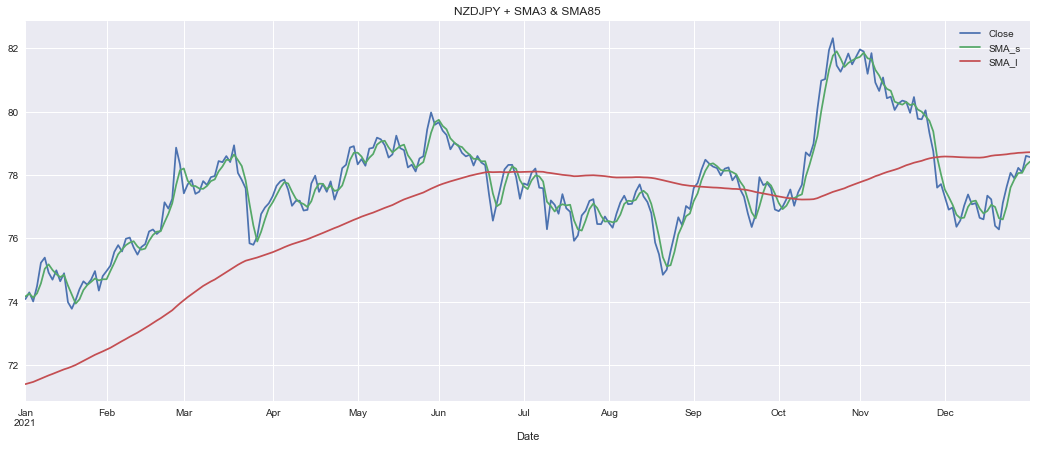

In [31]:
new_data["2021"].plot(figsize = (18,7), title = f"{pair} + SMA{sma_short} & SMA{sma_long}")
#plt.grid()
plt.show

In [32]:
# Define Positions (Long or Short). Where 1 = Buy, -1 = Sell

new_data["position"] = np.where(new_data["SMA_s"] > new_data["SMA_l"], 1, -1)
new_data

,Close,SMA_s,SMA_l,position
Date,,,,
2005-01-03,73.318001,73.573667,73.674930,-1
2005-01-04,73.257004,73.377335,73.694953,-1
2005-01-05,72.692001,73.089002,73.719271,-1
2005-01-06,73.318001,73.089002,73.741106,-1
2005-01-07,72.532997,72.847666,73.753777,-1
...,...,...,...,...
2022-06-14,84.214996,85.151332,82.632510,1
2022-06-15,84.232002,84.621666,82.720134,1
2022-06-16,84.370003,84.272334,82.806016,1


In [33]:
new_data["returns"] = np.log(new_data.Close.div(new_data.Close.shift(1)))


#daily return of strategy
new_data["strategy"] = new_data.position.shift(1) * new_data["returns"]
new_data.dropna(inplace = True)
new_data

,Close,SMA_s,SMA_l,position,returns,strategy
Date,,,,,,
2005-01-04,73.257004,73.377335,73.694953,-1,-0.000832,0.000832
2005-01-05,72.692001,73.089002,73.719271,-1,-0.007743,0.007743
2005-01-06,73.318001,73.089002,73.741106,-1,0.008575,-0.008575
2005-01-07,72.532997,72.847666,73.753777,-1,-0.010765,0.010765
2005-01-10,72.473999,72.774999,73.762248,-1,-0.000814,0.000814
...,...,...,...,...,...,...
2022-06-14,84.214996,85.151332,82.632510,1,-0.014184,-0.014184
2022-06-15,84.232002,84.621666,82.720134,1,0.000202,0.000202
2022-06-16,84.370003,84.272334,82.806016,1,0.001637,0.001637


In [34]:
#calculate absolute performance
new_data[["returns", "strategy"]].sum()

returns     0.155159
strategy    0.749470
dtype: float64

In [35]:
#CALCULATE ACTUAL VALUE OF ABSOLUTE PERFORMANCE

new_data[["returns", "strategy"]].sum().apply(np.exp)

returns     1.167844
strategy    2.115878
dtype: float64

In [36]:
#annual return
new_data[["returns", "strategy"]].mean() * 252

returns     0.008607
strategy    0.041573
dtype: float64

In [37]:
#annual risk
new_data[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.156457
strategy    0.156436
dtype: float64

In [38]:
new_data["cum_returns"] = new_data["returns"].cumsum().apply(np.exp)
new_data["cum_strategy"] = new_data["strategy"].cumsum().apply(np.exp)
new_data

,Close,SMA_s,SMA_l,position,returns,strategy,cum_returns,cum_strategy
Date,,,,,,,,
2005-01-04,73.257004,73.377335,73.694953,-1,-0.000832,0.000832,0.999168,1.000833
2005-01-05,72.692001,73.089002,73.719271,-1,-0.007743,0.007743,0.991462,1.008612
2005-01-06,73.318001,73.089002,73.741106,-1,0.008575,-0.008575,1.000000,1.000000
2005-01-07,72.532997,72.847666,73.753777,-1,-0.010765,0.010765,0.989293,1.010823
2005-01-10,72.473999,72.774999,73.762248,-1,-0.000814,0.000814,0.988488,1.011646
...,...,...,...,...,...,...,...,...
2022-06-14,84.214996,85.151332,82.632510,1,-0.014184,-0.014184,1.148626,2.081060
2022-06-15,84.232002,84.621666,82.720134,1,0.000202,0.000202,1.148858,2.081480
2022-06-16,84.370003,84.272334,82.806016,1,0.001637,0.001637,1.150741,2.084890


<function matplotlib.pyplot.show(close=None, block=None)>

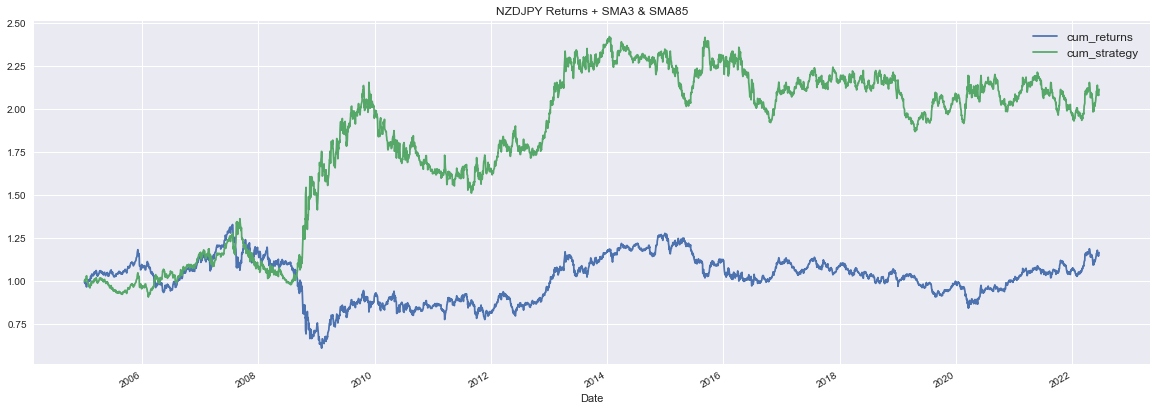

In [39]:
#Visualize Cummulative returns
new_data[["cum_returns", "cum_strategy"]].plot(figsize = (20,7), title = f"{pair} Returns + SMA{sma_short} & SMA{sma_long}" )
plt.legend(fontsize = 12)
plt.show